In [1000]:
from __future__ import print_function  # Python 2 and 3
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_rows', 80)
pd.set_option('display.max_columns', 80)


In [1001]:
data = pd.read_csv('to_model.csv', index_col=0)
test = pd.read_csv('to_test.csv', index_col=0)

In [1002]:
data

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,196.0,4,4,1,6,5,1710,4,8,0,0,5.0,2,2,548,208500,3114,706,3.5,61,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
2,80.0,9600,6,31,31,0.0,3,4,4,5,5,1262,3,6,1,3,31.0,2,2,460,181500,2984,978,2.5,298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0
3,68.0,11250,7,7,6,162.0,4,4,2,6,5,1786,4,6,1,3,7.0,2,2,608,223500,3314,486,3.5,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
4,60.0,9550,7,91,36,0.0,3,3,1,5,4,1717,4,7,1,4,8.0,1,3,642,140000,3115,216,2.0,307,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5,84.0,14260,8,8,8,350.0,4,4,3,6,5,2198,4,9,1,3,8.0,2,3,836,250000,4179,655,3.5,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,7,5,4,0.0,4,4,1,6,5,1221,4,6,0,0,5.0,2,2,400,185000,2842,410,3.0,113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1456,62.0,7917,6,8,7,0.0,3,4,1,1,5,1647,3,7,1,3,8.0,2,2,460,175000,3060,0,2.5,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0
1457,85.0,13175,6,32,22,119.0,3,4,1,5,3,2073,3,7,2,3,32.0,1,2,500,210000,4115,953,3.0,349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0


In [1003]:
set(data.columns) - set(test.columns)
set(test.columns) - set(data.columns)

{'Exterior1st_not present', 'Exterior2nd_not present', 'MasVnrType_Missing'}

In [1004]:
concat = pd.concat([data,test], axis=0, ignore_index=False, sort=False).fillna(0)
#len(data)
df_trainingset = concat[:1388]
df_testingset = concat[1388:]
df_testingset = df_testingset.drop('SalePrice', axis = 1)


In [1005]:
df_trainingset

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,SalePrice,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present,Exterior1st_not present,Exterior2nd_not present,MasVnrType_Missing
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,196.0,4,4,1,6,5,1710,4,8,0,0,5.0,2,2.0,548.0,208500.0,3114.0,706.0,3.5,61,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
2,80.0,9600,6,31,31,0.0,3,4,4,5,5,1262,3,6,1,3,31.0,2,2.0,460.0,181500.0,2984.0,978.0,2.5,298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
3,68.0,11250,7,7,6,162.0,4,4,2,6,5,1786,4,6,1,3,7.0,2,2.0,608.0,223500.0,3314.0,486.0,3.5,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
4,60.0,9550,7,91,36,0.0,3,3,1,5,4,1717,4,7,1,4,8.0,1,3.0,642.0,140000.0,3115.0,216.0,2.0,307,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0
5,84.0,14260,8,8,8,350.0,4,4,3,6,5,2198,4,9,1,3,8.0,2,3.0,836.0,250000.0,4179.0,655.0,3.5,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,7,5,4,0.0,4,4,1,6,5,1221,4,6,0,0,5.0,2,2.0,400.0,185000.0,2842.0,410.0,3.0,113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
1456,62.0,7917,6,8,7,0.0,3,4,1,1,5,1647,3,7,1,3,8.0,2,2.0,460.0,175000.0,3060.0,0.0,2.5,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
1457,85.0,13175,6,32,22,119.0,3,4,1,5,3,2073,3,7,2,3,32.0,1,2.0,500.0,210000.0,4115.0,953.0,3.0,349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0


# Multilinear Regression Model

In [1006]:
X =df_trainingset.drop('SalePrice', axis=1)
y = df_trainingset['SalePrice']

In [1007]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_IR2,LotShape_IR3,LotShape_Reg,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,...,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_not present,Exterior1st_not present,Exterior2nd_not present,MasVnrType_Missing
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,196.0,4,4,1,6,5,1710,4,8,0,0,5.0,2,2.0,548.0,3114.0,706.0,3.5,61,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
2,80.0,9600,6,31,31,0.0,3,4,4,5,5,1262,3,6,1,3,31.0,2,2.0,460.0,2984.0,978.0,2.5,298,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,1,0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
3,68.0,11250,7,7,6,162.0,4,4,2,6,5,1786,4,6,1,3,7.0,2,2.0,608.0,3314.0,486.0,3.5,42,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
4,60.0,9550,7,91,36,0.0,3,3,1,5,4,1717,4,7,1,4,8.0,1,3.0,642.0,3115.0,216.0,2.0,307,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,0.0
5,84.0,14260,8,8,8,350.0,4,4,3,6,5,2198,4,9,1,3,8.0,2,3.0,836.0,4179.0,655.0,3.5,276,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,7,5,4,0.0,4,4,1,6,5,1221,4,6,0,0,5.0,2,2.0,400.0,2842.0,410.0,3.0,113,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
1456,62.0,7917,6,8,7,0.0,3,4,1,1,5,1647,3,7,1,3,8.0,2,2.0,460.0,3060.0,0.0,2.5,40,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0.0,0,0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0
1457,85.0,13175,6,32,22,119.0,3,4,1,5,3,2073,3,7,2,3,32.0,1,2.0,500.0,4115.0,953.0,3.0,349,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0.0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0.0,0.0,0.0


In [1008]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(X,y)

In [1009]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression()

In [1010]:
ml.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1011]:
print("R2 = ", ml.score(Xtest,ytest))

print('Coefs = ', ml.coef_)

print('Intercept =', ml.intercept_)

R2 =  0.854097569097823
Coefs =  [ 1.73264680e+02  5.09791705e-01  9.34209908e+03 -2.58277132e+02
 -1.44763705e+02  3.42803025e+01  4.87669059e+03  4.41632238e+03
  3.87361661e+03  4.90328918e+02  2.09364626e+03  5.11628602e+01
  7.36020531e+03 -1.24536793e+03  4.86477384e+03 -1.58597981e+03
  1.12636440e+02  3.39185439e+03  1.99886111e+03  1.58992361e+01
  1.30758041e+01  2.19681226e+01 -4.53477930e+03  2.98413347e+01
 -3.63321792e+02 -8.18823119e+03 -1.31745622e+03 -5.92446045e+03
  1.13634859e+03  1.85681685e+04 -5.53818692e+03 -1.50892968e+03
  2.83493650e+04  4.48351570e+02  1.35111286e+03  4.25368812e+03
 -1.76484589e+04 -1.30553718e+04 -2.99049895e+03  7.20073818e+03
 -4.55555120e+03  2.61701978e+04  2.63682872e+04 -4.99282431e+03
  2.41501162e+03  2.50121097e+03 -4.85935176e+03  1.43229280e+04
  2.68082363e+04  3.34179738e+03  9.76051396e+03  1.32340102e+04
  5.04843304e+03 -4.71655808e+04 -2.65630567e+04  4.99535237e+02
  9.25546969e+02  6.16542618e+03 -1.09139364e-11  1.05776

In [1012]:
list(zip(list(ml.coef_), Xtest.columns))

[(173.26467958572766, 'LotFrontage'),
 (0.5097917053594916, 'LotArea'),
 (9342.099084625788, 'OverallQual'),
 (-258.27713224956995, 'YearBuilt'),
 (-144.7637050462385, 'YearRemodAdd'),
 (34.28030250801882, 'MasVnrArea'),
 (4876.6905912884085, 'ExterQual'),
 (4416.3223800080505, 'BsmtQual'),
 (3873.6166097842033, 'BsmtExposure'),
 (490.3289178382589, 'BsmtFinType1'),
 (2093.6462556591773, 'HeatingQC'),
 (51.16286015569642, 'GrLivArea'),
 (7360.205308445305, 'KitchenQual'),
 (-1245.3679279612634, 'TotRmsAbvGrd'),
 (4864.773835838612, 'Fireplaces'),
 (-1585.9798066860649, 'FireplaceQu'),
 (112.63643955224325, 'GarageYrBlt'),
 (3391.854393680848, 'GarageFinish'),
 (1998.8611058922947, 'GarageCars'),
 (15.899236148202363, 'GarageArea'),
 (13.075804149309988, 'TotalSF'),
 (21.968122562927874, 'TotalFinishedBsmt'),
 (-4534.779304395637, 'TotalBath'),
 (29.84133465564355, 'OutdoorFeatureSF'),
 (-363.3217921808988, 'LotShape_IR2'),
 (-8188.231192285791, 'LotShape_IR3'),
 (-1317.456217442785, 'L

In [1013]:
ml.predict(df_testingset)

array([125209.90728531, 166334.6786214 , 188338.2191666 , ...,
       182763.78184867, 103761.26653784, 214360.94425759])

In [1014]:
len(list(ml.coef_))

104

# Ridge and Lasso

In [1015]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error 

lasso = Lasso(tol = 0.001, max_iter = 100000)
ridge = Ridge()

In [1016]:
#setting alpha values that we want to grid search 
params_lasso = [{'alpha': [1* 10**i for i in range(-2,3)]}]
params_ridge = [{'alpha': [1*10**i for i in range(-2,3)]}]

In [1017]:
from sklearn.model_selection import GridSearchCV

grid_lasso = GridSearchCV(estimator = lasso, param_grid = params_lasso, cv=5)
grid_ridge = GridSearchCV(estimator = ridge, param_grid = params_ridge, cv=5)


In [1018]:
grid_lasso.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=100000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1019]:
grid_ridge.fit(X,y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid=[{'alpha': [0.01, 0.1, 1, 10, 100]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [1022]:
grid_lasso.best_score_

0.875522393609891

In [1023]:
grid_ridge.best_score_

0.8750742874180405

In [1024]:
top_lasso = grid_lasso.best_estimator_

In [1025]:
top_ridge = grid_ridge.best_estimator_

In [1026]:
print('Lasso Test Score:', top_lasso.score(X,y))
print('Ridge Test Score:', top_ridge.score(X,y))

Lasso Test Score: 0.8884025852785863
Ridge Test Score: 0.8910362926359991


In [1027]:
top_lasso.get_params

<bound method BaseEstimator.get_params of Lasso(alpha=100, copy_X=True, fit_intercept=True, max_iter=100000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.001, warm_start=False)>

In [1028]:
top_lasso.predict(df_testingset)

array([125457.41075785, 164007.7892159 , 179757.25917202, ...,
       190700.29323535, 114958.34588398, 219463.09519282])

In [1029]:
top_lasso.coef_

array([ 1.98321327e+02,  5.18746914e-01,  1.08429649e+04, -2.56933741e+02,
       -1.54087922e+02,  4.49380585e+01,  8.43154937e+03,  1.45214596e+03,
        4.84855712e+03,  0.00000000e+00,  1.22645252e+03,  4.06987179e+01,
        7.79420697e+03, -2.75130189e+02,  3.96784056e+03, -4.66509383e+02,
        3.78879428e+01,  1.47807098e+03,  7.07955015e+01,  1.10945921e+01,
        1.40775395e+01,  2.19694085e+01, -1.41118539e+03,  2.52617328e+01,
       -0.00000000e+00, -0.00000000e+00, -9.05015743e+01, -0.00000000e+00,
        0.00000000e+00,  1.61272515e+04, -0.00000000e+00, -3.40451104e+03,
        2.36913404e+04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -4.72028839e+03, -9.41084879e+01,  0.00000000e+00,
       -2.18050683e+02,  2.39864681e+04,  2.28055967e+04, -3.11204368e+03,
       -0.00000000e+00,  0.00000000e+00, -2.96253667e+03,  2.41346559e+03,
        2.40543023e+04, -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        5.82040531e+03, -

In [1030]:
l=[]
for i in range(len(top_lasso.coef_)):
    if top_lasso.coef_[i] != 0:
        l.append(i)
        
l

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 26,
 29,
 31,
 32,
 37,
 38,
 40,
 41,
 42,
 43,
 46,
 47,
 48,
 52,
 53,
 54,
 55,
 60,
 66,
 68,
 69,
 70,
 76,
 77,
 81,
 86,
 88,
 89,
 91,
 92,
 96,
 97,
 99,
 100]

In [1031]:
a = list(top_lasso.coef_[l])

In [1032]:
b = list(X.iloc[:,l].columns)

In [1033]:
X.iloc[:,l]

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,HeatingQC,GrLivArea,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageYrBlt,GarageFinish,GarageCars,GarageArea,TotalSF,TotalFinishedBsmt,TotalBath,OutdoorFeatureSF,LotShape_Reg,Neighborhood_BrkSide,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,Exterior1st_BrkFace,Exterior1st_Plywood,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_Plywood,Exterior2nd_Wd Shng,MasVnrType_None,MasVnrType_Stone,Foundation_PConc,Foundation_Slab,GarageType_Basment,GarageType_BuiltIn,GarageType_Detchd,GarageType_not present
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,7,5,5,196.0,4,4,1,5,1710,4,8,0,0,5.0,2,2.0,548.0,3114.0,706.0,3.5,61,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
2,80.0,9600,6,31,31,0.0,3,4,4,5,1262,3,6,1,3,31.0,2,2.0,460.0,2984.0,978.0,2.5,298,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,68.0,11250,7,7,6,162.0,4,4,2,5,1786,4,6,1,3,7.0,2,2.0,608.0,3314.0,486.0,3.5,42,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60.0,9550,7,91,36,0.0,3,3,1,4,1717,4,7,1,4,8.0,1,3.0,642.0,3115.0,216.0,2.0,307,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0
5,84.0,14260,8,8,8,350.0,4,4,3,5,2198,4,9,1,3,8.0,2,3.0,836.0,4179.0,655.0,3.5,276,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7500,7,5,4,0.0,4,4,1,5,1221,4,6,0,0,5.0,2,2.0,400.0,2842.0,410.0,3.0,113,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1456,62.0,7917,6,8,7,0.0,3,4,1,5,1647,3,7,1,3,8.0,2,2.0,460.0,3060.0,0.0,2.5,40,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0
1457,85.0,13175,6,32,22,119.0,3,4,1,3,2073,3,7,2,3,32.0,1,2.0,500.0,4115.0,953.0,3.0,349,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0.0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0


In [1036]:
d = pd.DataFrame(list(zip(a,b)))
d.columns = ['Coef','Feature']
d

,Coef,Feature
0,198.321327,LotFrontage
1,0.518747,LotArea
2,10842.964856,OverallQual
3,-256.933741,YearBuilt
4,-154.087922,YearRemodAdd
5,44.938059,MasVnrArea
6,8431.549374,ExterQual
7,1452.145963,BsmtQual
8,4848.557120,BsmtExposure
9,1226.452522,HeatingQC


In [1037]:
top_ridge.coef_

array([ 2.03679099e+02,  5.49780606e-01,  1.07484117e+04, -2.41152687e+02,
       -1.55234579e+02,  4.44891625e+01,  7.99843498e+03,  2.16232482e+03,
        4.97710389e+03,  3.66167943e+01,  1.50403315e+03,  4.45024179e+01,
        7.55411507e+03, -4.20783804e+02,  4.97312249e+03, -9.06348584e+02,
        5.93938428e+01,  1.73065210e+03,  1.23402859e+03,  1.08543213e+01,
        1.26843559e+01,  2.25622716e+01, -2.12856541e+03,  2.58071537e+01,
       -6.81178927e+02, -5.52130125e+03, -1.02416055e+03, -8.98525101e+02,
       -2.09351782e+03,  1.22854901e+04, -6.47885346e+03, -7.90437714e+03,
        1.78429983e+04, -2.74572186e+03, -4.90311221e+03, -1.47296263e+03,
       -8.13504280e+03, -1.00188583e+04, -4.72171348e+03,  4.01559463e+03,
       -5.61072812e+03,  1.68148430e+04,  1.79495248e+04, -7.37842255e+03,
       -3.46852772e+03, -1.56452809e+03, -7.69200876e+03,  9.89644909e+01,
        1.73445413e+04, -5.07467605e+03,  3.59100562e+03,  6.56871263e+03,
        7.68260819e+03, -

In [1038]:
top_ridge.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [1039]:
print("R2 = ", top_ridge.score(Xtest,ytest))

print('Coefs = ', top_ridge.coef_)

print('Intercept =', top_ridge.intercept_)

R2 =  0.8752022575457711
Coefs =  [ 2.03679099e+02  5.49780606e-01  1.07484117e+04 -2.41152687e+02
 -1.55234579e+02  4.44891625e+01  7.99843498e+03  2.16232482e+03
  4.97710389e+03  3.66167943e+01  1.50403315e+03  4.45024179e+01
  7.55411507e+03 -4.20783804e+02  4.97312249e+03 -9.06348584e+02
  5.93938428e+01  1.73065210e+03  1.23402859e+03  1.08543213e+01
  1.26843559e+01  2.25622716e+01 -2.12856541e+03  2.58071537e+01
 -6.81178927e+02 -5.52130125e+03 -1.02416055e+03 -8.98525101e+02
 -2.09351782e+03  1.22854901e+04 -6.47885346e+03 -7.90437714e+03
  1.78429983e+04 -2.74572186e+03 -4.90311221e+03 -1.47296263e+03
 -8.13504280e+03 -1.00188583e+04 -4.72171348e+03  4.01559463e+03
 -5.61072812e+03  1.68148430e+04  1.79495248e+04 -7.37842255e+03
 -3.46852772e+03 -1.56452809e+03 -7.69200876e+03  9.89644909e+01
  1.73445413e+04 -5.07467605e+03  3.59100562e+03  6.56871263e+03
  7.68260819e+03 -1.11336607e+04 -6.94358269e+03  1.27526514e+03
  2.73926289e+01  1.87008226e+03 -1.02234191e+03 -3.4557

# ElasticNet

In [1048]:
elastic = ElasticNet()

In [1049]:
params_elastic = {'alpha': [1* 10**i for i in range(-2,3)],
                  'l1_ratio': [i/10 for i in range(1,10)]}
#parametersGrid = {"max_iter": [1, 5, 10],
                      #"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                      #"l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [1050]:
grid_elastic = GridSearchCV(estimator = elastic, param_grid = params_elastic, cv=5, verbose=1, scoring='r2')

In [1051]:
grid_elastic.fit(Xtrain,ytrain) #i/10 for i in range(1,10)

Fitting 5 folds for each of 45 candidates, totalling 225 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 225 out of 225 | elapsed:    2.9s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=1)

In [1052]:
grid_elastic.best_score_

0.8744994588009454

In [1053]:
top_elastic = grid_elastic.best_estimator_

In [1054]:
top_elastic.score(Xtest,ytest)

0.8571578131334474

In [1055]:
grid_elastic.best_params_

{'alpha': 0.1, 'l1_ratio': 0.8}

In [1058]:
print("R2 = ", top_elastic.score(X,y))

print('Best Params=', grid_elastic.best_params_ )

print('Coefs = ', top_elastic.coef_)

print('Intercept =', top_elastic.intercept_)

R2 =  0.8851229941724917
Best Params= {'alpha': 0.1, 'l1_ratio': 0.8}
Coefs =  [ 2.20362486e+02  4.39796842e-01  1.05865538e+04 -2.88787413e+02
 -1.39656996e+02  4.04607399e+01  7.64116032e+03  1.31167034e+03
  3.96188313e+03  2.20708045e+02  1.78246469e+03  4.80885595e+01
  8.17454302e+03 -2.19901258e+03  3.50230843e+03 -5.55834083e+02
  8.45280555e+01  1.65126987e+03  1.23167927e+03  1.06120981e+01
  1.52201307e+01  2.30166235e+01 -3.89574171e+03  2.53699909e+01
 -1.19775128e+03 -2.12925453e+03 -2.03313222e+03 -3.38791385e+02
 -9.76866128e+02  9.39602079e+03 -3.54066182e+03 -6.27630756e+03
  1.38635963e+04 -5.96837049e+02 -3.47214900e+03  1.30183232e+03
 -4.62035274e+03 -9.20822635e+03 -4.08970456e+03  2.18223773e+03
 -4.74819392e+03  9.95983627e+03  1.14588248e+04 -8.68665563e+03
 -3.27555260e+03 -8.58624050e+02 -5.93874159e+03  4.59355638e+03
  8.54469052e+03 -1.76897625e+03  1.00454220e+03  4.77505538e+03
  3.79041701e+03 -7.12394506e+03 -5.35263748e+03  1.37723830e+03
 -8.6696083

# Random Forest

In [1059]:
rf_train = pd.read_csv('rf_training.csv', index_col=0)
rf_test = pd.read_csv('rf_test.csv', index_col=0)

In [1060]:
from sklearn import ensemble
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
randomForest = ensemble.RandomForestRegressor()


In [1061]:
randomForest.set_params(n_estimators=50, random_state=42, max_features=10)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features=10, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=50,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [1062]:
le=LabelEncoder()

In [1063]:
#rf_train['LotShape'].fit_transform
categorical_features = [feature for feature in rf_train.columns if rf_train[feature].dtypes == 'O']
for feature in categorical_features:
    rf_train[feature]=le.fit_transform(rf_train[feature])
    rf_test[feature]=le.fit_transform(rf_test[feature])

In [1064]:
Xrf = rf_train.drop('SalePrice',axis=1)
yrf = rf_train['SalePrice']


Xrf_train, Xrf_test, yrf_train, y_rf_test = train_test_split(Xrf,yrf)

In [1065]:
grid_param_forest = [{
    "n_estimators": [10, 25,50,75,100],
    "random_state": [42]}]

grid_randomForest= GridSearchCV(estimator = randomForest,param_grid=grid_param_forest, scoring='r2',cv=5)

grid_randomForest.fit(Xrf_train, yrf_train)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                             max_depth=None, max_features=10,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=50, n_jobs=None,
                                             oob_score=False, random_state=42,
                                             verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid=[{'n_estimators': [10, 25, 50, 75, 100],
                          'random_state': [42]

In [1066]:
grid_randomForest.best_params_

{'n_estimators': 100, 'random_state': 42}

In [1067]:
top_forest = grid_randomForest.best_estimator_

In [1068]:
top_forest.predict(Xrf_test)

array([145253.  , 182243.  , 204584.  , 246964.88,  80497.22, 336384.94,
       107839.  , 191489.14, 383256.5 , 121756.34, 123159.34, 131532.  ,
       142854.5 , 144228.  , 171143.7 , 216748.32,  84908.88, 353635.67,
       274721.55, 133117.35, 101250.94, 139901.69, 126920.14, 123086.5 ,
       197300.32, 226465.9 , 187110.2 , 149278.5 , 164255.19, 153336.49,
       255989.76, 171000.03, 580939.24, 144214.  , 182670.89, 171004.85,
       147457.99,  98022.79, 331204.49, 241102.89, 167185.  , 207850.6 ,
       205720.1 ,  85009.97, 190485.95, 262034.53, 280668.64, 138224.25,
       135942.5 , 203498.26, 133719.4 , 152136.6 , 198817.05, 100485.04,
       188415.15, 142775.18, 168705.  , 192000.49, 113943.31, 454944.43,
       101699.08, 197618.22, 180344.9 , 133573.75, 165448.84, 160619.63,
       337830.39, 319045.1 , 170423.82, 166908.  , 261168.23, 142317.1 ,
       145589.46, 438913.13, 244743.18, 127926.13, 299436.39, 144978.52,
       145159.27, 149309.62, 101374.5 , 113959.5 , 

In [1072]:
top_forest.score(Xrf_test, y_rf_test)

0.883768506816534

In [1070]:
top_forest.predict(rf_test)

array([130996.37, 158991.07, 185951.9 , ..., 161888.22, 113229.5 ,
       227792.62])

In [1078]:
top_forest.oob_score_

AttributeError: 'RandomForestRegressor' object has no attribute 'oob_score_'

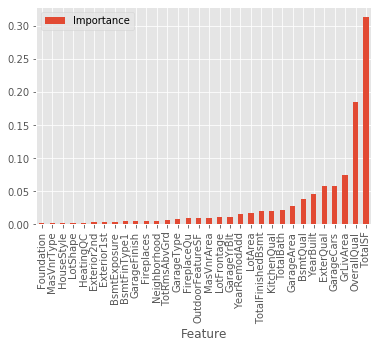

In [1071]:
feature_importance=pd.DataFrame(zip(list(top_forest.feature_importances_),rf_test.columns))
feature_importance.columns = ['Importance','Feature']
feature_importance.sort_values('Importance').plot.bar(x='Feature',y='Importance')

### Predict and Save To .csv file

In [974]:
pred = top_forest.predict(rf_test)

In [975]:
p = pd.DataFrame(pred)

In [976]:
i = pd.DataFrame(test.index)

In [977]:
results = pd.concat([i, p], axis=1)
results.columns = ['Id', 'SalePrice']

In [978]:
results.reset_index(drop=True, inplace=True)


In [979]:
results.reset_index(drop=True, inplace=True)

In [1074]:
results.head(10)

,Id,SalePrice
0,1461,130829.00
1,1462,155614.00
2,1463,172694.64
3,1464,181612.21
4,1465,187816.75
5,1466,176567.82
6,1467,173471.50
7,1468,171340.26
8,1469,188256.72
9,1470,129107.68


In [981]:
results.to_csv('submission10_forest.csv', index=False)